In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [2]:
IMAGE_SIZE = 255
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = (BATCH_SIZE)
    )

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
68*32

2176

In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 255, 255, 3)
[0 2 1 1 1 0 2 1 0 2 1 1 1 0 0 1 1 0 0 1 2 1 0 0 1 0 0 1 0 0 1 0]


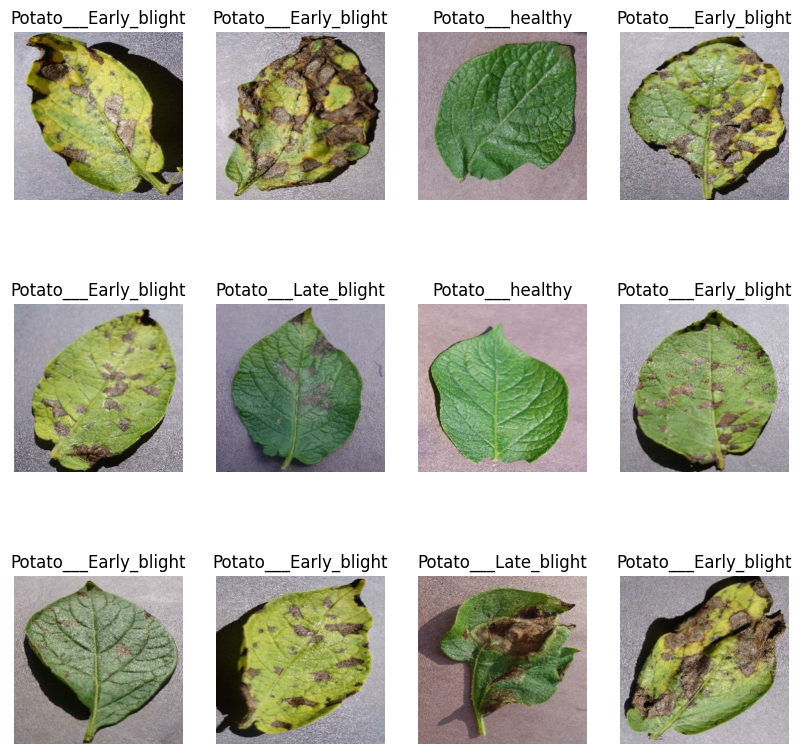

In [8]:
plt.figure(figsize = (10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

In [9]:
80% ==> training
20% ==> 10% validation,10% test

SyntaxError: invalid syntax (1918983628.py, line 1)

In [10]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [11]:
train_ds = dataset.take(54)
len(train_ds)

54

In [12]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [13]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [14]:
val_ds = dataset.take(6)
len(val_ds)

6

In [15]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [16]:
def get_dataset_partitions_tf(ds,train_split = 0.8,val_split = 0.1,test_split = 0.1,shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size   = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds,test_ds,val_ds

In [17]:
train_ds,test_ds,val_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

54

In [19]:
len(val_ds)

6

In [20]:
len(test_ds)

8

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds   = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [28]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
        resize_and_rescale,
        data_augmentation,
        layers.Conv2D(32,(3,3),activation = "relu",input_shape = input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,kernel_size = (3,3),activation = "relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,kernel_size = (3,3),activation = "relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation = "relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation = "relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation = "relu"),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64,activation = "relu"),
        layers.Dense(n_classes,activation = "softmax")
])
model.build(input_shape = input_shape)

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 255, 255, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 255, 255, 3)         0         
                                                                 
 conv2d_19 (Conv2D)          (32, 253, 253, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPooli  (32, 126, 126, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (32, 124, 124, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [31]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
model.fit(
        train_ds,
        epochs = EPOCHS,
        batch_size = BATCH_SIZE,
        verbose = 1,
        validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 210s 4s/step - loss: 0.8660 - accuracy: 0.5058 - val_loss: 0.7658 - val_accuracy: 0.5521
Epoch 2/50
54/54 [==============================] - 184s 3s/step - loss: 0.6264 - accuracy: 0.7112 - val_loss: 0.5084 - val_accuracy: 0.7969
Epoch 3/50
54/54 [==============================] - 203s 4s/step - loss: 0.4691 - accuracy: 0.7928 - val_loss: 0.6077 - val_accuracy: 0.7552
Epoch 4/50
54/54 [==============================] - 183s 3s/step - loss: 0.3597 - accuracy: 0.8600 - val_loss: 0.3067 - val_accuracy: 0.8854
Epoch 5/50
54/54 [==============================] - 184s 3s/step - loss: 0.2849 - accuracy: 0.8900 - val_loss: 0.2730 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 184s 3s/step - loss: 0.2292 - accuracy: 0.9074 - val_loss: 0.2974 - val_accuracy: 0.8646
Epoch 7/50
54/54 [==============================] - 296s 6s/step - loss: 0.1610 - accuracy: 0.9323 - val_loss: 0.1998 - val_accuracy: 0.9167
Epoch 8/50
54